In [1]:
!conda install -c conda-forge beautifulsoup4 --yes
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
import folium 
import matplotlib.cm as cm
import matplotlib.colors as colors

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.1
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - beautifulsoup4


The following NEW packages will be INSTALLED:

  beautifulsoup4     conda-forge/noarch::beautifulsoup4-4.9.3-pyhb0f4dca_0
  soupsieve          conda-forge/noarch::soupsieve-2.0.1-py_1

The following packages will be UPDATED:

  ca-certificates                      2020.6.20-hecda079_0 --> 2020.11.8-ha878542_0
  certifi                          2020.6.20-py36h9880bd3_2 --> 2020.11.8-py36h5fab9bb_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [2]:
!pip install opencage

In [3]:
!pip install lxml

     |████████████████████████████████| 5.5MB 6.0MB/s eta 0:00:01


In [4]:
# get the response in the form of html
wikiurl="https://id.wikipedia.org/wiki/Daftar_kecamatan_dan_kelurahan_di_Kota_Administrasi_Jakarta_Selatan"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


In [5]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
southjakartatable=soup.find('table',{'class':"wikitable"})

In [6]:
df=pd.read_html(str(southjakartatable))
# convert list to dataframe
df_southjakarta=pd.DataFrame(df[0])
print(df_southjakarta.head())

  Kode Kemendagri         Kecamatan  Jumlah Kelurahan  \
0        31.74.06          Cilandak                 5   
1        31.74.09         Jagakarsa                 6   
2        31.74.07    Kebayoran Baru                10   
3        31.74.05    Kebayoran Lama                 6   
4        31.74.03  Mampang Prapatan                 5   

                                    Daftar Kelurahan  
0  Cilandak Barat Cipete Selatan Gandaria Selatan...  
1  Ciganjur Cipedak Jagakarsa Lenteng Agung Sreng...  
2  Cipete Utara Gandaria Utara Gunung Kramat Pela...  
3  Cipulir Grogol Selatan Grogol Utara Kebayoran ...  
4  Bangka Kuningan Barat Mampang Prapatan Pela Ma...  


In [7]:
df_southjakarta

,Kode Kemendagri,Kecamatan,Jumlah Kelurahan,Daftar Kelurahan
0,31.74.06,Cilandak,5,Cilandak Barat Cipete Selatan Gandaria Selatan...
1,31.74.09,Jagakarsa,6,Ciganjur Cipedak Jagakarsa Lenteng Agung Sreng...
2,31.74.07,Kebayoran Baru,10,Cipete Utara Gandaria Utara Gunung Kramat Pela...
3,31.74.05,Kebayoran Lama,6,Cipulir Grogol Selatan Grogol Utara Kebayoran ...
4,31.74.03,Mampang Prapatan,5,Bangka Kuningan Barat Mampang Prapatan Pela Ma...
5,31.74.08,Pancoran,6,Cikoko Duren Tiga Kalibata Pancoran Pengadegan...
6,31.74.04,Pasar Minggu,7,Cilandak Timur Jati Padang Kebagusan Pasar Min...
7,31.74.10,Pesanggrahan,5,Bintaro Pesanggrahan Petukangan Selatan Petuka...
8,31.74.02,Setiabudi,8,Guntur Karet Kuningan Karet Semanggi Karet Kun...
9,31.74.01,Tebet,7,Bukit Duri Kebon Baru Manggarai Selatan Mangga...


In [8]:
df_southjakarta.drop([10],inplace=True)
df_southjakarta

,Kode Kemendagri,Kecamatan,Jumlah Kelurahan,Daftar Kelurahan
0,31.74.06,Cilandak,5,Cilandak Barat Cipete Selatan Gandaria Selatan...
1,31.74.09,Jagakarsa,6,Ciganjur Cipedak Jagakarsa Lenteng Agung Sreng...
2,31.74.07,Kebayoran Baru,10,Cipete Utara Gandaria Utara Gunung Kramat Pela...
3,31.74.05,Kebayoran Lama,6,Cipulir Grogol Selatan Grogol Utara Kebayoran ...
4,31.74.03,Mampang Prapatan,5,Bangka Kuningan Barat Mampang Prapatan Pela Ma...
5,31.74.08,Pancoran,6,Cikoko Duren Tiga Kalibata Pancoran Pengadegan...
6,31.74.04,Pasar Minggu,7,Cilandak Timur Jati Padang Kebagusan Pasar Min...
7,31.74.10,Pesanggrahan,5,Bintaro Pesanggrahan Petukangan Selatan Petuka...
8,31.74.02,Setiabudi,8,Guntur Karet Kuningan Karet Semanggi Karet Kun...
9,31.74.01,Tebet,7,Bukit Duri Kebon Baru Manggarai Selatan Mangga...


In [9]:
df_southjakarta.insert(1, "City", ['South Jakarta', 'South Jakarta', 'South Jakarta', 'South Jakarta','South Jakarta','South Jakarta','South Jakarta','South Jakarta','South Jakarta','South Jakarta'], True) 
df_southjakarta

,Kode Kemendagri,City,Kecamatan,Jumlah Kelurahan,Daftar Kelurahan
0,31.74.06,South Jakarta,Cilandak,5,Cilandak Barat Cipete Selatan Gandaria Selatan...
1,31.74.09,South Jakarta,Jagakarsa,6,Ciganjur Cipedak Jagakarsa Lenteng Agung Sreng...
2,31.74.07,South Jakarta,Kebayoran Baru,10,Cipete Utara Gandaria Utara Gunung Kramat Pela...
3,31.74.05,South Jakarta,Kebayoran Lama,6,Cipulir Grogol Selatan Grogol Utara Kebayoran ...
4,31.74.03,South Jakarta,Mampang Prapatan,5,Bangka Kuningan Barat Mampang Prapatan Pela Ma...
5,31.74.08,South Jakarta,Pancoran,6,Cikoko Duren Tiga Kalibata Pancoran Pengadegan...
6,31.74.04,South Jakarta,Pasar Minggu,7,Cilandak Timur Jati Padang Kebagusan Pasar Min...
7,31.74.10,South Jakarta,Pesanggrahan,5,Bintaro Pesanggrahan Petukangan Selatan Petuka...
8,31.74.02,South Jakarta,Setiabudi,8,Guntur Karet Kuningan Karet Semanggi Karet Kun...
9,31.74.01,South Jakarta,Tebet,7,Bukit Duri Kebon Baru Manggarai Selatan Mangga...


In [10]:
df_southjakarta

,Kode Kemendagri,City,Kecamatan,Jumlah Kelurahan,Daftar Kelurahan
0,31.74.06,South Jakarta,Cilandak,5,Cilandak Barat Cipete Selatan Gandaria Selatan...
1,31.74.09,South Jakarta,Jagakarsa,6,Ciganjur Cipedak Jagakarsa Lenteng Agung Sreng...
2,31.74.07,South Jakarta,Kebayoran Baru,10,Cipete Utara Gandaria Utara Gunung Kramat Pela...
3,31.74.05,South Jakarta,Kebayoran Lama,6,Cipulir Grogol Selatan Grogol Utara Kebayoran ...
4,31.74.03,South Jakarta,Mampang Prapatan,5,Bangka Kuningan Barat Mampang Prapatan Pela Ma...
5,31.74.08,South Jakarta,Pancoran,6,Cikoko Duren Tiga Kalibata Pancoran Pengadegan...
6,31.74.04,South Jakarta,Pasar Minggu,7,Cilandak Timur Jati Padang Kebagusan Pasar Min...
7,31.74.10,South Jakarta,Pesanggrahan,5,Bintaro Pesanggrahan Petukangan Selatan Petuka...
8,31.74.02,South Jakarta,Setiabudi,8,Guntur Karet Kuningan Karet Semanggi Karet Kun...
9,31.74.01,South Jakarta,Tebet,7,Bukit Duri Kebon Baru Manggarai Selatan Mangga...


In [11]:
# get the response in the form of html
wikiurl="https://id.wikipedia.org/wiki/Daftar_kecamatan_dan_kelurahan_di_Kota_Administrasi_Jakarta_Barat"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


In [12]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
westjakartatable=soup.find('table',{'class':"wikitable"})

In [13]:
df=pd.read_html(str(westjakartatable))
# convert list to dataframe
df_westjakarta=pd.DataFrame(df[0])
print(df_westjakarta.head())

  Kode Kemendagri          Kecamatan  Jumlah Kelurahan  \
0        31.73.01         Cengkareng                 6   
1        31.73.02  Grogol Petamburan                 7   
2        31.73.03         Taman Sari                 8   
3        31.73.04            Tambora                11   
4        31.73.05        Kebon Jeruk                 7   

                                    Daftar Kelurahan  
0  Cengkareng Barat Cengkareng Timur Duri Kosambi...  
1  Grogol Jelambar Baru Jelambar Tanjung Duren Se...  
2  Glodok Keagungan Krukut Mangga Besar Maphar Pi...  
3  Angke Duri Selatan Duri Utara Jembatan Besi Je...  
4  Duri Kepa Kebon Jeruk Kedoya Selatan Kedoya Ut...  


In [14]:
df_westjakarta

,Kode Kemendagri,Kecamatan,Jumlah Kelurahan,Daftar Kelurahan
0,31.73.01,Cengkareng,6,Cengkareng Barat Cengkareng Timur Duri Kosambi...
1,31.73.02,Grogol Petamburan,7,Grogol Jelambar Baru Jelambar Tanjung Duren Se...
2,31.73.03,Taman Sari,8,Glodok Keagungan Krukut Mangga Besar Maphar Pi...
3,31.73.04,Tambora,11,Angke Duri Selatan Duri Utara Jembatan Besi Je...
4,31.73.05,Kebon Jeruk,7,Duri Kepa Kebon Jeruk Kedoya Selatan Kedoya Ut...
5,31.73.06,Kalideres,5,Kalideres Kamal Pegadungan Semanan Tegal Alur
6,31.73.07,Palmerah,6,Jatipulo Kemanggisan Kota Bambu Selatan Kota B...
7,31.73.08,Kembangan,6,Joglo Kembangan Selatan Kembangan Utara Meruya...
8,NaN,TOTAL,56,Sumber: Peraturan Menteri Dalam Negeri Nomor 1...


In [15]:
df_westjakarta.drop([8],inplace=True)
df_westjakarta

,Kode Kemendagri,Kecamatan,Jumlah Kelurahan,Daftar Kelurahan
0,31.73.01,Cengkareng,6,Cengkareng Barat Cengkareng Timur Duri Kosambi...
1,31.73.02,Grogol Petamburan,7,Grogol Jelambar Baru Jelambar Tanjung Duren Se...
2,31.73.03,Taman Sari,8,Glodok Keagungan Krukut Mangga Besar Maphar Pi...
3,31.73.04,Tambora,11,Angke Duri Selatan Duri Utara Jembatan Besi Je...
4,31.73.05,Kebon Jeruk,7,Duri Kepa Kebon Jeruk Kedoya Selatan Kedoya Ut...
5,31.73.06,Kalideres,5,Kalideres Kamal Pegadungan Semanan Tegal Alur
6,31.73.07,Palmerah,6,Jatipulo Kemanggisan Kota Bambu Selatan Kota B...
7,31.73.08,Kembangan,6,Joglo Kembangan Selatan Kembangan Utara Meruya...


In [16]:
df_westjakarta.insert(1, "City", ['West Jakarta','West Jakarta','West Jakarta','West Jakarta','West Jakarta','West Jakarta','West Jakarta','West Jakarta'], True) 
df_westjakarta

,Kode Kemendagri,City,Kecamatan,Jumlah Kelurahan,Daftar Kelurahan
0,31.73.01,West Jakarta,Cengkareng,6,Cengkareng Barat Cengkareng Timur Duri Kosambi...
1,31.73.02,West Jakarta,Grogol Petamburan,7,Grogol Jelambar Baru Jelambar Tanjung Duren Se...
2,31.73.03,West Jakarta,Taman Sari,8,Glodok Keagungan Krukut Mangga Besar Maphar Pi...
3,31.73.04,West Jakarta,Tambora,11,Angke Duri Selatan Duri Utara Jembatan Besi Je...
4,31.73.05,West Jakarta,Kebon Jeruk,7,Duri Kepa Kebon Jeruk Kedoya Selatan Kedoya Ut...
5,31.73.06,West Jakarta,Kalideres,5,Kalideres Kamal Pegadungan Semanan Tegal Alur
6,31.73.07,West Jakarta,Palmerah,6,Jatipulo Kemanggisan Kota Bambu Selatan Kota B...
7,31.73.08,West Jakarta,Kembangan,6,Joglo Kembangan Selatan Kembangan Utara Meruya...


In [17]:
df_westjakarta

,Kode Kemendagri,City,Kecamatan,Jumlah Kelurahan,Daftar Kelurahan
0,31.73.01,West Jakarta,Cengkareng,6,Cengkareng Barat Cengkareng Timur Duri Kosambi...
1,31.73.02,West Jakarta,Grogol Petamburan,7,Grogol Jelambar Baru Jelambar Tanjung Duren Se...
2,31.73.03,West Jakarta,Taman Sari,8,Glodok Keagungan Krukut Mangga Besar Maphar Pi...
3,31.73.04,West Jakarta,Tambora,11,Angke Duri Selatan Duri Utara Jembatan Besi Je...
4,31.73.05,West Jakarta,Kebon Jeruk,7,Duri Kepa Kebon Jeruk Kedoya Selatan Kedoya Ut...
5,31.73.06,West Jakarta,Kalideres,5,Kalideres Kamal Pegadungan Semanan Tegal Alur
6,31.73.07,West Jakarta,Palmerah,6,Jatipulo Kemanggisan Kota Bambu Selatan Kota B...
7,31.73.08,West Jakarta,Kembangan,6,Joglo Kembangan Selatan Kembangan Utara Meruya...


In [18]:
# get the response in the form of html
wikiurl="https://id.wikipedia.org/wiki/Daftar_kecamatan_dan_kelurahan_di_Kota_Administrasi_Jakarta_Utara"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


In [19]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
northjakartatable=soup.find('table',{'class':"wikitable"})

In [20]:
df=pd.read_html(str(northjakartatable))
# convert list to dataframe
df_northjakarta=pd.DataFrame(df[0])
print(df_northjakarta.head())

  Kemendagri      Kecamatan  Jumlah Kelurahan  \
0   31.72.04      Cilincing                 7   
1   31.72.06  Kelapa Gading                 3   
2   31.72.03           Koja                 6   
3   31.72.05     Pademangan                 3   
4   31.72.01    Penjaringan                 5   

                                    Daftar Kelurahan  
0  Cilincing Kalibaru Marunda Rorotan Semper Bara...  
1  Kelapa Gading Barat Kelapa Gading Timur Pegang...  
2  Koja Lagoa Rawa Badak Selatan Rawa Badak Utara...  
3            Ancol Pademangan Barat Pademangan Timur  
4  Kamal Muara Kapuk Muara Pejagalan Penjaringan ...  


In [21]:
df_northjakarta

,Kemendagri,Kecamatan,Jumlah Kelurahan,Daftar Kelurahan
0,31.72.04,Cilincing,7,Cilincing Kalibaru Marunda Rorotan Semper Bara...
1,31.72.06,Kelapa Gading,3,Kelapa Gading Barat Kelapa Gading Timur Pegang...
2,31.72.03,Koja,6,Koja Lagoa Rawa Badak Selatan Rawa Badak Utara...
3,31.72.05,Pademangan,3,Ancol Pademangan Barat Pademangan Timur
4,31.72.01,Penjaringan,5,Kamal Muara Kapuk Muara Pejagalan Penjaringan ...
5,31.72.02,Tanjung Priok,7,Kebon Bawang Papanggo Sungai Bambu Sunter Agun...
6,NaN,TOTAL,31,NaN


In [22]:
df_northjakarta.drop([6],inplace=True)
df_northjakarta

,Kemendagri,Kecamatan,Jumlah Kelurahan,Daftar Kelurahan
0,31.72.04,Cilincing,7,Cilincing Kalibaru Marunda Rorotan Semper Bara...
1,31.72.06,Kelapa Gading,3,Kelapa Gading Barat Kelapa Gading Timur Pegang...
2,31.72.03,Koja,6,Koja Lagoa Rawa Badak Selatan Rawa Badak Utara...
3,31.72.05,Pademangan,3,Ancol Pademangan Barat Pademangan Timur
4,31.72.01,Penjaringan,5,Kamal Muara Kapuk Muara Pejagalan Penjaringan ...
5,31.72.02,Tanjung Priok,7,Kebon Bawang Papanggo Sungai Bambu Sunter Agun...


In [23]:
df_northjakarta.insert(1, "City", ['North Jakarta','North Jakarta','North Jakarta','North Jakarta','North Jakarta','North Jakarta'], True) 
df_northjakarta

,Kemendagri,City,Kecamatan,Jumlah Kelurahan,Daftar Kelurahan
0,31.72.04,North Jakarta,Cilincing,7,Cilincing Kalibaru Marunda Rorotan Semper Bara...
1,31.72.06,North Jakarta,Kelapa Gading,3,Kelapa Gading Barat Kelapa Gading Timur Pegang...
2,31.72.03,North Jakarta,Koja,6,Koja Lagoa Rawa Badak Selatan Rawa Badak Utara...
3,31.72.05,North Jakarta,Pademangan,3,Ancol Pademangan Barat Pademangan Timur
4,31.72.01,North Jakarta,Penjaringan,5,Kamal Muara Kapuk Muara Pejagalan Penjaringan ...
5,31.72.02,North Jakarta,Tanjung Priok,7,Kebon Bawang Papanggo Sungai Bambu Sunter Agun...


In [24]:
df_northjakarta

,Kemendagri,City,Kecamatan,Jumlah Kelurahan,Daftar Kelurahan
0,31.72.04,North Jakarta,Cilincing,7,Cilincing Kalibaru Marunda Rorotan Semper Bara...
1,31.72.06,North Jakarta,Kelapa Gading,3,Kelapa Gading Barat Kelapa Gading Timur Pegang...
2,31.72.03,North Jakarta,Koja,6,Koja Lagoa Rawa Badak Selatan Rawa Badak Utara...
3,31.72.05,North Jakarta,Pademangan,3,Ancol Pademangan Barat Pademangan Timur
4,31.72.01,North Jakarta,Penjaringan,5,Kamal Muara Kapuk Muara Pejagalan Penjaringan ...
5,31.72.02,North Jakarta,Tanjung Priok,7,Kebon Bawang Papanggo Sungai Bambu Sunter Agun...


In [25]:
# get the response in the form of html
wikiurl="https://id.wikipedia.org/wiki/Daftar_kecamatan_dan_kelurahan_di_Kota_Administrasi_Jakarta_Timur"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


In [26]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
eastjakartatable=soup.find('table',{'class':"wikitable"})

In [27]:
df=pd.read_html(str(eastjakartatable))
# convert list to dataframe
df_eastjakarta=pd.DataFrame(df[0])
print(df_eastjakarta.head())

  Kemendagri    Kecamatan  Jumlah Kelurahan  \
0   31.75.06       Cakung                 7   
1   31.75.10     Cipayung                 8   
2   31.75.09      Ciracas                 5   
3   31.75.07  Duren Sawit                 7   
4   31.75.03   Jatinegara                 8   

                                    Daftar Kelurahan  
0  Cakung Barat Cakung Timur Jatinegara Penggilin...  
1  Bambu Apus Ceger Cilangkap Cipayung Lubang Bua...  
2  Cibubur Ciracas Kelapa Dua Wetan Rambutan Susukan  
3  Duren Sawit Klender Malaka Jaya Malaka Sari Po...  
4  Bali Mester Bidara Cina Cipinang Besar Selatan...  


In [28]:
df_eastjakarta

,Kemendagri,Kecamatan,Jumlah Kelurahan,Daftar Kelurahan
0,31.75.06,Cakung,7,Cakung Barat Cakung Timur Jatinegara Penggilin...
1,31.75.10,Cipayung,8,Bambu Apus Ceger Cilangkap Cipayung Lubang Bua...
2,31.75.09,Ciracas,5,Cibubur Ciracas Kelapa Dua Wetan Rambutan Susukan
3,31.75.07,Duren Sawit,7,Duren Sawit Klender Malaka Jaya Malaka Sari Po...
4,31.75.03,Jatinegara,8,Bali Mester Bidara Cina Cipinang Besar Selatan...
5,31.75.04,Kramat Jati,7,Balekambang Batu Ampar Cawang Cililitan Dukuh ...
6,31.75.08,Makasar,5,Cipinang Melayu Halim Perdana Kusuma Kebon Pal...
7,31.75.01,Matraman,6,Kayu Manis Kebon Manggis Pal Meriam Pisangan B...
8,31.75.05,Pasar Rebo,5,Baru Cijantung Gedong Kalisari Pekayon
9,31.75.02,Pulo Gadung,7,Cipinang Jati Jatinegara Kaum Kayu Putih Pisan...


In [29]:
df_eastjakarta.drop([10],inplace=True)
df_eastjakarta

,Kemendagri,Kecamatan,Jumlah Kelurahan,Daftar Kelurahan
0,31.75.06,Cakung,7,Cakung Barat Cakung Timur Jatinegara Penggilin...
1,31.75.10,Cipayung,8,Bambu Apus Ceger Cilangkap Cipayung Lubang Bua...
2,31.75.09,Ciracas,5,Cibubur Ciracas Kelapa Dua Wetan Rambutan Susukan
3,31.75.07,Duren Sawit,7,Duren Sawit Klender Malaka Jaya Malaka Sari Po...
4,31.75.03,Jatinegara,8,Bali Mester Bidara Cina Cipinang Besar Selatan...
5,31.75.04,Kramat Jati,7,Balekambang Batu Ampar Cawang Cililitan Dukuh ...
6,31.75.08,Makasar,5,Cipinang Melayu Halim Perdana Kusuma Kebon Pal...
7,31.75.01,Matraman,6,Kayu Manis Kebon Manggis Pal Meriam Pisangan B...
8,31.75.05,Pasar Rebo,5,Baru Cijantung Gedong Kalisari Pekayon
9,31.75.02,Pulo Gadung,7,Cipinang Jati Jatinegara Kaum Kayu Putih Pisan...


In [30]:
df_eastjakarta.insert(1, "City", ['East Jakarta','East Jakarta','East Jakarta','East Jakarta','East Jakarta','East Jakarta','East Jakarta','East Jakarta','East Jakarta','East Jakarta'], True) 
df_eastjakarta

,Kemendagri,City,Kecamatan,Jumlah Kelurahan,Daftar Kelurahan
0,31.75.06,East Jakarta,Cakung,7,Cakung Barat Cakung Timur Jatinegara Penggilin...
1,31.75.10,East Jakarta,Cipayung,8,Bambu Apus Ceger Cilangkap Cipayung Lubang Bua...
2,31.75.09,East Jakarta,Ciracas,5,Cibubur Ciracas Kelapa Dua Wetan Rambutan Susukan
3,31.75.07,East Jakarta,Duren Sawit,7,Duren Sawit Klender Malaka Jaya Malaka Sari Po...
4,31.75.03,East Jakarta,Jatinegara,8,Bali Mester Bidara Cina Cipinang Besar Selatan...
5,31.75.04,East Jakarta,Kramat Jati,7,Balekambang Batu Ampar Cawang Cililitan Dukuh ...
6,31.75.08,East Jakarta,Makasar,5,Cipinang Melayu Halim Perdana Kusuma Kebon Pal...
7,31.75.01,East Jakarta,Matraman,6,Kayu Manis Kebon Manggis Pal Meriam Pisangan B...
8,31.75.05,East Jakarta,Pasar Rebo,5,Baru Cijantung Gedong Kalisari Pekayon
9,31.75.02,East Jakarta,Pulo Gadung,7,Cipinang Jati Jatinegara Kaum Kayu Putih Pisan...


In [31]:
# get the response in the form of html
wikiurl="https://id.wikipedia.org/wiki/Daftar_kecamatan_dan_kelurahan_di_Kota_Administrasi_Jakarta_Pusat"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


In [32]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
centraljakartatable=soup.find('table',{'class':"wikitable"})

In [33]:
df=pd.read_html(str(centraljakartatable))
# convert list to dataframe
df_centraljakarta=pd.DataFrame(df[0])
print(df_centraljakarta.head())

  Kode Kemendagri      Kecamatan  Jumlah Kelurahan  \
0        31.71.05  Cempaka Putih                 3   
1        31.71.01         Gambir                 6   
2        31.71.08     Johar Baru                 4   
3        31.71.03      Kemayoran                 8   
4        31.71.06        Menteng                 5   

                                    Daftar Kelurahan  
0   Cempaka Putih Barat Cempaka Putih Timur Rawasari  
1  Cideng Duri Pulo Gambir Kebon Kelapa Petojo Se...  
2         Galur Johar Baru Kampung Rawa Tanah Tinggi  
3  Cempaka Baru Gunung Sahari Selatan Harapan Mul...  
4   Cikini Gondangdia Kebon Sirih Menteng Pegangsaan  


In [34]:
df_centraljakarta

,Kode Kemendagri,Kecamatan,Jumlah Kelurahan,Daftar Kelurahan
0,31.71.05,Cempaka Putih,3,Cempaka Putih Barat Cempaka Putih Timur Rawasari
1,31.71.01,Gambir,6,Cideng Duri Pulo Gambir Kebon Kelapa Petojo Se...
2,31.71.08,Johar Baru,4,Galur Johar Baru Kampung Rawa Tanah Tinggi
3,31.71.03,Kemayoran,8,Cempaka Baru Gunung Sahari Selatan Harapan Mul...
4,31.71.06,Menteng,5,Cikini Gondangdia Kebon Sirih Menteng Pegangsaan
5,31.71.02,Sawah Besar,5,Gunung Sahari Utara Karang Anyar Kartini Mangg...
6,31.71.04,Senen,6,Bungur Kenari Kramat Kwitang Paseban Senen
7,31.71.07,Tanah Abang,7,Bendungan Hilir Gelora Kampung Bali Karet Teng...
8,NaN,TOTAL,44,NaN


In [35]:
df_centraljakarta.drop([8],inplace=True)
df_centraljakarta

,Kode Kemendagri,Kecamatan,Jumlah Kelurahan,Daftar Kelurahan
0,31.71.05,Cempaka Putih,3,Cempaka Putih Barat Cempaka Putih Timur Rawasari
1,31.71.01,Gambir,6,Cideng Duri Pulo Gambir Kebon Kelapa Petojo Se...
2,31.71.08,Johar Baru,4,Galur Johar Baru Kampung Rawa Tanah Tinggi
3,31.71.03,Kemayoran,8,Cempaka Baru Gunung Sahari Selatan Harapan Mul...
4,31.71.06,Menteng,5,Cikini Gondangdia Kebon Sirih Menteng Pegangsaan
5,31.71.02,Sawah Besar,5,Gunung Sahari Utara Karang Anyar Kartini Mangg...
6,31.71.04,Senen,6,Bungur Kenari Kramat Kwitang Paseban Senen
7,31.71.07,Tanah Abang,7,Bendungan Hilir Gelora Kampung Bali Karet Teng...


In [36]:
df_centraljakarta.insert(1, "City", ['Central Jakarta', 'Central Jakarta', 'Central Jakarta', 'Central Jakarta','Central Jakarta','Central Jakarta','Central Jakarta','Central Jakarta'], True) 
df_centraljakarta

,Kode Kemendagri,City,Kecamatan,Jumlah Kelurahan,Daftar Kelurahan
0,31.71.05,Central Jakarta,Cempaka Putih,3,Cempaka Putih Barat Cempaka Putih Timur Rawasari
1,31.71.01,Central Jakarta,Gambir,6,Cideng Duri Pulo Gambir Kebon Kelapa Petojo Se...
2,31.71.08,Central Jakarta,Johar Baru,4,Galur Johar Baru Kampung Rawa Tanah Tinggi
3,31.71.03,Central Jakarta,Kemayoran,8,Cempaka Baru Gunung Sahari Selatan Harapan Mul...
4,31.71.06,Central Jakarta,Menteng,5,Cikini Gondangdia Kebon Sirih Menteng Pegangsaan
5,31.71.02,Central Jakarta,Sawah Besar,5,Gunung Sahari Utara Karang Anyar Kartini Mangg...
6,31.71.04,Central Jakarta,Senen,6,Bungur Kenari Kramat Kwitang Paseban Senen
7,31.71.07,Central Jakarta,Tanah Abang,7,Bendungan Hilir Gelora Kampung Bali Karet Teng...


In [37]:
concatenate = [df_southjakarta, df_eastjakarta, df_westjakarta, df_northjakarta, df_centraljakarta]

df_jakarta = pd.concat(concatenate)
df_jakarta.head()

,Kode Kemendagri,City,Kecamatan,Jumlah Kelurahan,Daftar Kelurahan,Kemendagri
0,31.74.06,South Jakarta,Cilandak,5,Cilandak Barat Cipete Selatan Gandaria Selatan...,NaN
1,31.74.09,South Jakarta,Jagakarsa,6,Ciganjur Cipedak Jagakarsa Lenteng Agung Sreng...,NaN
2,31.74.07,South Jakarta,Kebayoran Baru,10,Cipete Utara Gandaria Utara Gunung Kramat Pela...,NaN
3,31.74.05,South Jakarta,Kebayoran Lama,6,Cipulir Grogol Selatan Grogol Utara Kebayoran ...,NaN
4,31.74.03,South Jakarta,Mampang Prapatan,5,Bangka Kuningan Barat Mampang Prapatan Pela Ma...,NaN


In [38]:
df_jakarta

,Kode Kemendagri,City,Kecamatan,Jumlah Kelurahan,Daftar Kelurahan,Kemendagri
0,31.74.06,South Jakarta,Cilandak,5,Cilandak Barat Cipete Selatan Gandaria Selatan...,NaN
1,31.74.09,South Jakarta,Jagakarsa,6,Ciganjur Cipedak Jagakarsa Lenteng Agung Sreng...,NaN
2,31.74.07,South Jakarta,Kebayoran Baru,10,Cipete Utara Gandaria Utara Gunung Kramat Pela...,NaN
3,31.74.05,South Jakarta,Kebayoran Lama,6,Cipulir Grogol Selatan Grogol Utara Kebayoran ...,NaN
4,31.74.03,South Jakarta,Mampang Prapatan,5,Bangka Kuningan Barat Mampang Prapatan Pela Ma...,NaN
5,31.74.08,South Jakarta,Pancoran,6,Cikoko Duren Tiga Kalibata Pancoran Pengadegan...,NaN
6,31.74.04,South Jakarta,Pasar Minggu,7,Cilandak Timur Jati Padang Kebagusan Pasar Min...,NaN
7,31.74.10,South Jakarta,Pesanggrahan,5,Bintaro Pesanggrahan Petukangan Selatan Petuka...,NaN
8,31.74.02,South Jakarta,Setiabudi,8,Guntur Karet Kuningan Karet Semanggi Karet Kun...,NaN
9,31.74.01,South Jakarta,Tebet,7,Bukit Duri Kebon Baru Manggarai Selatan Mangga...,NaN


### Drop Unrelated Columns

In [39]:
df_jakarta.drop(["Daftar Kelurahan","Kode Kemendagri",'Kemendagri',"Jumlah Kelurahan"], axis=1, inplace=True)
df_jakarta

,City,Kecamatan
0,South Jakarta,Cilandak
1,South Jakarta,Jagakarsa
2,South Jakarta,Kebayoran Baru
3,South Jakarta,Kebayoran Lama
4,South Jakarta,Mampang Prapatan
5,South Jakarta,Pancoran
6,South Jakarta,Pasar Minggu
7,South Jakarta,Pesanggrahan
8,South Jakarta,Setiabudi
9,South Jakarta,Tebet


In [40]:
df_jakarta = df_jakarta.rename(columns={"Kecamatan": "District"})
df_jakarta

,City,District
0,South Jakarta,Cilandak
1,South Jakarta,Jagakarsa
2,South Jakarta,Kebayoran Baru
3,South Jakarta,Kebayoran Lama
4,South Jakarta,Mampang Prapatan
5,South Jakarta,Pancoran
6,South Jakarta,Pasar Minggu
7,South Jakarta,Pesanggrahan
8,South Jakarta,Setiabudi
9,South Jakarta,Tebet


In [41]:
df_jakarta.reset_index(drop=True, inplace=True)
df_jakarta

,City,District
0,South Jakarta,Cilandak
1,South Jakarta,Jagakarsa
2,South Jakarta,Kebayoran Baru
3,South Jakarta,Kebayoran Lama
4,South Jakarta,Mampang Prapatan
5,South Jakarta,Pancoran
6,South Jakarta,Pasar Minggu
7,South Jakarta,Pesanggrahan
8,South Jakarta,Setiabudi
9,South Jakarta,Tebet


### Download the data consist of the coordinates of each distric that has been processed before

In [42]:
df_coor = pd.read_csv(r'Inner Jakarta Cities District Coordinates.csv')
df_coor

,District,Latitude,Longitude
0,Cilandak,-6.289759,106.772842
1,Jagakarsa,-6.330330,106.790444
2,Kebayoran Baru,-6.243176,106.783831
3,Kebayoran Lama,-6.249235,106.745362
4,Mampang Prapatan,-6.250242,106.804506
5,Pancoran,-6.257905,106.826132
6,Pasar Minggu,-6.289773,106.821566
7,Pesanggrahan,-6.254211,106.720168
8,Setiabudi,-6.221734,106.812879
9,Tebet,-6.225480,106.833254


In [43]:
geo_merged = pd.merge(df_coor, df_jakarta, on='District')

In [44]:
geo_data=geo_merged[['City','District','Latitude','Longitude']]

In [45]:
geo_data

,City,District,Latitude,Longitude
0,South Jakarta,Cilandak,-6.289759,106.772842
1,South Jakarta,Jagakarsa,-6.330330,106.790444
2,South Jakarta,Kebayoran Baru,-6.243176,106.783831
3,South Jakarta,Kebayoran Lama,-6.249235,106.745362
4,South Jakarta,Mampang Prapatan,-6.250242,106.804506
5,South Jakarta,Pancoran,-6.257905,106.826132
6,South Jakarta,Pasar Minggu,-6.289773,106.821566
7,South Jakarta,Pesanggrahan,-6.254211,106.720168
8,South Jakarta,Setiabudi,-6.221734,106.812879
9,South Jakarta,Tebet,-6.225480,106.833254


In [139]:
geo_data.shape

(42, 4)

In [140]:
geo_data.head()

,City,District,Latitude,Longitude
0,South Jakarta,Cilandak,-6.289759,106.772842
1,South Jakarta,Jagakarsa,-6.330330,106.790444
2,South Jakarta,Kebayoran Baru,-6.243176,106.783831
3,South Jakarta,Kebayoran Lama,-6.249235,106.745362
4,South Jakarta,Mampang Prapatan,-6.250242,106.804506


In [144]:
# create map of Tokyo using latitude and longitude values
map_jakarta = folium.Map(location=[-6.2293867, 106.6894297], zoom_start=11)

 # add markers to map
for lat, lng, label in zip(geo_data['Latitude'], geo_data['Longitude'], geo_data['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_jakarta) 
    
map_jakarta

In [ ]:
### Fetching data from Foursquare

In [46]:
CLIENT_ID = 'insert your client id' # your Foursquare ID
CLIENT_SECRET = 'insert your client secret' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EQ5C4QRPFNZYBLLBUVMEA1TS23SLA5ZNPGENCTYJOUESG412
CLIENT_SECRET:ADFFVV1ILSMGOO0GMNKKAAIEFLTKQW04G40DJ4NN33EGYESR


In [47]:
def getNearbyVenues(names, latitudes, longitudes):
    radius=500
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [48]:
jakarta_venues = getNearbyVenues(names=geo_data['District'],
                                   latitudes=geo_data['Latitude'],
                                   longitudes=geo_data['Longitude']
                                  )

Cilandak
Jagakarsa
Kebayoran Baru
Kebayoran Lama
Mampang Prapatan
Pancoran
Pasar Minggu
Pesanggrahan
Setiabudi
Tebet
Cengkareng
Grogol Petamburan
Taman Sari
Tambora
Kebon Jeruk
Kalideres
Palmerah
Kembangan
Cilincing
Kelapa Gading
Koja
Pademangan
Penjaringan
Tanjung Priok
Cakung
Cipayung
Ciracas
Duren Sawit
Jatinegara
Kramat Jati
Makasar
Matraman
Pasar Rebo
Pulo Gadung
Cempaka Putih
Gambir
Johar Baru
Kemayoran
Menteng
Sawah Besar
Senen
Tanah Abang


In [49]:
jakarta_venues.head()

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cilandak,-6.289759,106.772842,Sate Padang Talago Biru,-6.288731,106.770937,Food Truck
1,Cilandak,-6.289759,106.772842,Okirobox @ Carrefour Lb. Bulus,-6.287761,106.776271,Japanese Restaurant
2,Cilandak,-6.289759,106.772842,Chatime,-6.287720,106.776384,Bubble Tea Shop
3,Cilandak,-6.289759,106.772842,Imperial Kitchen & Dimsum,-6.287811,106.776385,Asian Restaurant
4,Cilandak,-6.289759,106.772842,Carrefour,-6.287690,106.776346,Supermarket


In [50]:
print (jakarta_venues['Venue Category'].value_counts())

Indonesian Restaurant    47
Coffee Shop              45
Asian Restaurant         36
Hotel                    27
Convenience Store        26
                         ..
Bowling Alley             1
Smoke Shop                1
Historic Site             1
Pet Service               1
College Cafeteria         1
Name: Venue Category, Length: 164, dtype: int64


In [52]:
print('There are {} uniques categories.'.format(len(jakarta_venues['Venue Category'].unique())))

There are 164 uniques categories.


In [54]:
jakarta_venues_top10=jakarta_venues['Venue Category'].value_counts()
jakarta_venues_top10

Indonesian Restaurant    47
Coffee Shop              45
Asian Restaurant         36
Hotel                    27
Convenience Store        26
                         ..
Bowling Alley             1
Smoke Shop                1
Historic Site             1
Pet Service               1
College Cafeteria         1
Name: Venue Category, Length: 164, dtype: int64

In [55]:
jakarta_venues_top10=jakarta_venues_top10.reset_index()


In [56]:
jakarta_venues_top10.rename(index=str, columns={"index": "Venue Category", "Venue Category": "Frequency"}, inplace=True)
jakarta_venues_top10

,Venue Category,Frequency
0,Indonesian Restaurant,47
1,Coffee Shop,45
2,Asian Restaurant,36
3,Hotel,27
4,Convenience Store,26
...,...,...
159,Bowling Alley,1
160,Smoke Shop,1
161,Historic Site,1
162,Pet Service,1


In [57]:
jakarta_venues_top10.drop(jakarta_venues_top10.tail(153).index, 
        inplace = True) 
jakarta_venues_top10
  

,Venue Category,Frequency
0,Indonesian Restaurant,47
1,Coffee Shop,45
2,Asian Restaurant,36
3,Hotel,27
4,Convenience Store,26
5,Café,26
6,Food Truck,25
7,Chinese Restaurant,23
8,Restaurant,21
9,Pizza Place,20


In [59]:
jakarta_venues_top10.dtypes

Venue Category    object
Frequency          int64
dtype: object

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


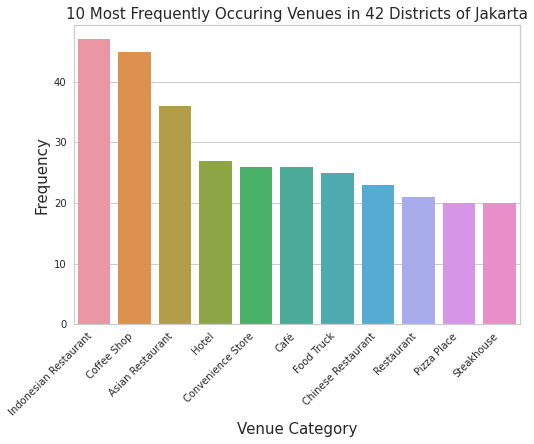

<Figure size 1296x504 with 0 Axes>

In [145]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue Category", y="Frequency", data=jakarta_venues_top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Venues in 42 Districts of Jakarta', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

In [62]:
print ("Shape of the Data-Frame with Top 10 Venue Category: ", jakarta_venues.shape)
jakarta_venues.head(10)

Shape of the Data-Frame with Top 10 Venue Category:  (762, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cilandak,-6.289759,106.772842,Sate Padang Talago Biru,-6.288731,106.770937,Food Truck
1,Cilandak,-6.289759,106.772842,Okirobox @ Carrefour Lb. Bulus,-6.287761,106.776271,Japanese Restaurant
2,Cilandak,-6.289759,106.772842,Chatime,-6.287720,106.776384,Bubble Tea Shop
3,Cilandak,-6.289759,106.772842,Imperial Kitchen & Dimsum,-6.287811,106.776385,Asian Restaurant
4,Cilandak,-6.289759,106.772842,Carrefour,-6.287690,106.776346,Supermarket
5,Cilandak,-6.289759,106.772842,Mie Ayam Pak Tua,-6.287849,106.774179,Noodle House
6,Cilandak,-6.289759,106.772842,J.Co Donuts & Coffee,-6.288114,106.776533,Donut Shop
7,Cilandak,-6.289759,106.772842,The Coffee Bean & Tea Leaf,-6.287983,106.776484,Coffee Shop
8,Cilandak,-6.289759,106.772842,Cirendeu Permai,-6.291574,106.768967,Dog Run
9,Cilandak,-6.289759,106.772842,KFC,-6.288183,106.776554,Fast Food Restaurant


In [63]:
jakarta_venues.columns.tolist()

['District',
 'District Latitude',
 'District Longitude',
 'Venue',
 'Venue Latitude',
 'Venue Longitude',
 'Venue Category']

In [64]:
jakarta_onehot = pd.get_dummies(jakarta_venues[['Venue Category']], prefix="", prefix_sep="")
jakarta_onehot.insert(loc=0, column='District', value=jakarta_venues['District'] )
jakarta_onehot.shape

(762, 165)

In [65]:
jakarta_onehot

,District,Accessories Store,Acehnese Restaurant,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Badminton Court,...,Tea Room,Thai Restaurant,Theme Park,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Women's Store
0,Cilandak,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Cilandak,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cilandak,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Cilandak,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Cilandak,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,Tanah Abang,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
758,Tanah Abang,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
759,Tanah Abang,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
760,Tanah Abang,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
jakarta_grouped = jakarta_onehot.groupby('District').mean().reset_index()
jakarta_grouped

,District,Accessories Store,Acehnese Restaurant,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Badminton Court,...,Tea Room,Thai Restaurant,Theme Park,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Women's Store
0,Cakung,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Cempaka Putih,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Cengkareng,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Cilandak,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.055556,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Cilincing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Cipayung,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Ciracas,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Duren Sawit,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Gambir,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Grogol Petamburan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [67]:
jakarta_grouped

,District,Accessories Store,Acehnese Restaurant,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Badminton Court,...,Tea Room,Thai Restaurant,Theme Park,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Women's Store
0,Cakung,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Cempaka Putih,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Cengkareng,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Cilandak,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.055556,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Cilincing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Cipayung,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Ciracas,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Duren Sawit,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Gambir,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Grogol Petamburan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [68]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [69]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

districts_venues_sorted = pd.DataFrame(columns=columns)
districts_venues_sorted['District'] = jakarta_grouped['District']

for ind in np.arange(jakarta_grouped.shape[0]):
    districts_venues_sorted.iloc[ind, 1:] = return_most_common_venues(jakarta_grouped.iloc[ind, :], num_top_venues)

districts_venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cakung,Plaza,Food Truck,Park,Chinese Restaurant,Pizza Place,Gym,Fish & Chips Shop,Farmers Market,Factory,Event Space
1,Cempaka Putih,Convenience Store,Indonesian Restaurant,Electronics Store,Food Court,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Factory
2,Cengkareng,Asian Restaurant,Café,Women's Store,Event Space,Food Court,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
3,Cilandak,Coffee Shop,Playground,Food Truck,Bus Station,Fast Food Restaurant,Japanese Restaurant,Chinese Restaurant,Steakhouse,Sundanese Restaurant,Supermarket
4,Cilincing,Food Truck,Restaurant,Indonesian Meatball Place,Indonesian Restaurant,Electronics Store,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market


In [70]:
districts_venues_sorted

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cakung,Plaza,Food Truck,Park,Chinese Restaurant,Pizza Place,Gym,Fish & Chips Shop,Farmers Market,Factory,Event Space
1,Cempaka Putih,Convenience Store,Indonesian Restaurant,Electronics Store,Food Court,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Factory
2,Cengkareng,Asian Restaurant,Café,Women's Store,Event Space,Food Court,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
3,Cilandak,Coffee Shop,Playground,Food Truck,Bus Station,Fast Food Restaurant,Japanese Restaurant,Chinese Restaurant,Steakhouse,Sundanese Restaurant,Supermarket
4,Cilincing,Food Truck,Restaurant,Indonesian Meatball Place,Indonesian Restaurant,Electronics Store,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
5,Cipayung,Soccer Stadium,Gym,Grocery Store,Asian Restaurant,Fast Food Restaurant,Stadium,Indonesian Restaurant,Food Court,Factory,Event Space
6,Ciracas,Food Truck,Pizza Place,Dessert Shop,Mexican Restaurant,Noodle House,Jazz Club,Event Space,Food,Fish & Chips Shop,Fast Food Restaurant
7,Duren Sawit,Fast Food Restaurant,Soup Place,Night Market,Pharmacy,Smoke Shop,Sports Bar,Diner,Indonesian Restaurant,Coffee Shop,Park
8,Gambir,Fast Food Restaurant,Hotel,Indonesian Restaurant,Convenience Store,Café,Halal Restaurant,Music Venue,Coffee Shop,Electronics Store,Restaurant
9,Grogol Petamburan,Bed & Breakfast,Coffee Shop,Fast Food Restaurant,Chinese Restaurant,Soup Place,Women's Store,Factory,Food Court,Food & Drink Shop,Food


In [75]:
!conda install -c districtdatalabs yellowbrick -y
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.1
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [74]:
!pip install scikit-learn==0.20.0

     |████████████████████████████████| 5.3MB 3.8MB/s eta 0:00:01     |█████████████▎                  | 2.2MB 3.8MB/s eta 0:00:01     |█████████████████████████▊      | 4.3MB 3.8MB/s eta 0:00:01     |████████████████████████████▉   | 4.8MB 3.8MB/s eta 0:00:01
  Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


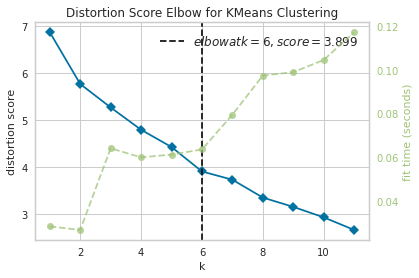

In [77]:
jakarta_grouped_clustering = jakarta_grouped.drop('District', 1)
jakarta_model = KMeans(random_state=1)
plt.figure(figsize=(6,4))
visualizer = KElbowVisualizer(jakarta_model, k=(1,12)).fit(jakarta_grouped_clustering).show() # Fit the data to the visualizer

In [119]:
kclusters = 6

jakarta_grouped_clustering = jakarta_grouped.drop('District', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(jakarta_grouped_clustering)
kmeans.labels_[0:10]

array([1, 2, 3, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [120]:
districts_venues_sorted

,Cluster Labels,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Cakung,Plaza,Food Truck,Park,Chinese Restaurant,Pizza Place,Gym,Fish & Chips Shop,Farmers Market,Factory,Event Space
1,1,Cempaka Putih,Convenience Store,Indonesian Restaurant,Electronics Store,Food Court,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Factory
2,1,Cengkareng,Asian Restaurant,Café,Women's Store,Event Space,Food Court,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
3,2,Cilandak,Coffee Shop,Playground,Food Truck,Bus Station,Fast Food Restaurant,Japanese Restaurant,Chinese Restaurant,Steakhouse,Sundanese Restaurant,Supermarket
4,0,Cilincing,Food Truck,Restaurant,Indonesian Meatball Place,Indonesian Restaurant,Electronics Store,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
5,2,Cipayung,Soccer Stadium,Gym,Grocery Store,Asian Restaurant,Fast Food Restaurant,Stadium,Indonesian Restaurant,Food Court,Factory,Event Space
6,0,Ciracas,Food Truck,Pizza Place,Dessert Shop,Mexican Restaurant,Noodle House,Jazz Club,Event Space,Food,Fish & Chips Shop,Fast Food Restaurant
7,2,Duren Sawit,Fast Food Restaurant,Soup Place,Night Market,Pharmacy,Smoke Shop,Sports Bar,Diner,Indonesian Restaurant,Coffee Shop,Park
8,2,Gambir,Fast Food Restaurant,Hotel,Indonesian Restaurant,Convenience Store,Café,Halal Restaurant,Music Venue,Coffee Shop,Electronics Store,Restaurant
9,2,Grogol Petamburan,Bed & Breakfast,Coffee Shop,Fast Food Restaurant,Chinese Restaurant,Soup Place,Women's Store,Factory,Food Court,Food & Drink Shop,Food


In [121]:
districts_venues_sorted.drop(['Cluster Labels'], axis=1,inplace=True)

In [122]:
districts_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

jakarta_merged = geo_data
jakarta_merged = jakarta_merged.join(districts_venues_sorted.set_index('District'), on='District')
jakarta_merged.head()

,City,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,South Jakarta,Cilandak,-6.289759,106.772842,0,Coffee Shop,Playground,Food Truck,Bus Station,Fast Food Restaurant,Japanese Restaurant,Chinese Restaurant,Steakhouse,Sundanese Restaurant,Supermarket
1,South Jakarta,Jagakarsa,-6.330330,106.790444,5,Indonesian Restaurant,Metro Station,Event Space,Food Court,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Factory
2,South Jakarta,Kebayoran Baru,-6.243176,106.783831,0,Steakhouse,Japanese Restaurant,Coffee Shop,Café,Bakery,Dessert Shop,Ice Cream Shop,Chinese Restaurant,Electronics Store,Korean Restaurant
3,South Jakarta,Kebayoran Lama,-6.249235,106.745362,3,Food Court,Comfort Food Restaurant,Asian Restaurant,Café,Food Truck,Women's Store,Factory,Food & Drink Shop,Food,Fish & Chips Shop
4,South Jakarta,Mampang Prapatan,-6.250242,106.804506,0,Coffee Shop,Indonesian Restaurant,Food Truck,Sushi Restaurant,Noodle House,Asian Restaurant,BBQ Joint,Japanese Restaurant,Salon / Barbershop,Restaurant


In [123]:
jakarta_merged

,City,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,South Jakarta,Cilandak,-6.289759,106.772842,0,Coffee Shop,Playground,Food Truck,Bus Station,Fast Food Restaurant,Japanese Restaurant,Chinese Restaurant,Steakhouse,Sundanese Restaurant,Supermarket
1,South Jakarta,Jagakarsa,-6.330330,106.790444,5,Indonesian Restaurant,Metro Station,Event Space,Food Court,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Factory
2,South Jakarta,Kebayoran Baru,-6.243176,106.783831,0,Steakhouse,Japanese Restaurant,Coffee Shop,Café,Bakery,Dessert Shop,Ice Cream Shop,Chinese Restaurant,Electronics Store,Korean Restaurant
3,South Jakarta,Kebayoran Lama,-6.249235,106.745362,3,Food Court,Comfort Food Restaurant,Asian Restaurant,Café,Food Truck,Women's Store,Factory,Food & Drink Shop,Food,Fish & Chips Shop
4,South Jakarta,Mampang Prapatan,-6.250242,106.804506,0,Coffee Shop,Indonesian Restaurant,Food Truck,Sushi Restaurant,Noodle House,Asian Restaurant,BBQ Joint,Japanese Restaurant,Salon / Barbershop,Restaurant
5,South Jakarta,Pancoran,-6.257905,106.826132,0,Restaurant,Pool Hall,Karaoke Bar,Supermarket,Coffee Shop,Farmers Market,Fast Food Restaurant,Food Truck,Spa,Indonesian Restaurant
6,South Jakarta,Pasar Minggu,-6.289773,106.821566,0,Food Truck,Indonesian Restaurant,Asian Restaurant,Food Court,Soup Place,Noodle House,Coffee Shop,Restaurant,Caribbean Restaurant,Café
7,South Jakarta,Pesanggrahan,-6.254211,106.720168,1,Playground,Donut Shop,Electronics Store,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Factory,Event Space
8,South Jakarta,Setiabudi,-6.221734,106.812879,0,Café,Hotel,Fast Food Restaurant,Shopping Mall,Boutique,Coffee Shop,Bistro,Japanese Restaurant,Convenience Store,Cultural Center
9,South Jakarta,Tebet,-6.225480,106.833254,0,Coffee Shop,Shopping Mall,Javanese Restaurant,Hotel,Dim Sum Restaurant,Chinese Restaurant,Asian Restaurant,Restaurant,Bubble Tea Shop,Buffet


In [146]:
map_clusters = folium.Map(location=[-6.2839313,106.7320388], zoom_start=11)


x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


markers_colors = []
for lat, lon, poi, cluster in zip(jakarta_merged['Latitude'], jakarta_merged['Longitude'], jakarta_merged['District'], jakarta_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color = rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [133]:
jakarta_merged.loc[jakarta_merged['Cluster Labels'] == 0, jakarta_merged.columns[[0] + [1] + list(range(5, jakarta_merged.shape[1]))]]


,City,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,South Jakarta,Cilandak,Coffee Shop,Playground,Food Truck,Bus Station,Fast Food Restaurant,Japanese Restaurant,Chinese Restaurant,Steakhouse,Sundanese Restaurant,Supermarket
2,South Jakarta,Kebayoran Baru,Steakhouse,Japanese Restaurant,Coffee Shop,Café,Bakery,Dessert Shop,Ice Cream Shop,Chinese Restaurant,Electronics Store,Korean Restaurant
4,South Jakarta,Mampang Prapatan,Coffee Shop,Indonesian Restaurant,Food Truck,Sushi Restaurant,Noodle House,Asian Restaurant,BBQ Joint,Japanese Restaurant,Salon / Barbershop,Restaurant
5,South Jakarta,Pancoran,Restaurant,Pool Hall,Karaoke Bar,Supermarket,Coffee Shop,Farmers Market,Fast Food Restaurant,Food Truck,Spa,Indonesian Restaurant
6,South Jakarta,Pasar Minggu,Food Truck,Indonesian Restaurant,Asian Restaurant,Food Court,Soup Place,Noodle House,Coffee Shop,Restaurant,Caribbean Restaurant,Café
8,South Jakarta,Setiabudi,Café,Hotel,Fast Food Restaurant,Shopping Mall,Boutique,Coffee Shop,Bistro,Japanese Restaurant,Convenience Store,Cultural Center
9,South Jakarta,Tebet,Coffee Shop,Shopping Mall,Javanese Restaurant,Hotel,Dim Sum Restaurant,Chinese Restaurant,Asian Restaurant,Restaurant,Bubble Tea Shop,Buffet
11,West Jakarta,Grogol Petamburan,Bed & Breakfast,Coffee Shop,Fast Food Restaurant,Chinese Restaurant,Soup Place,Women's Store,Factory,Food Court,Food & Drink Shop,Food
14,West Jakarta,Kebon Jeruk,Coffee Shop,Pizza Place,Japanese Restaurant,Eastern European Restaurant,Supermarket,Karaoke Bar,General Entertainment,Sushi Restaurant,Bookstore,Shabu-Shabu Restaurant
17,West Jakarta,Kembangan,Restaurant,Indonesian Restaurant,Donut Shop,Steakhouse,Soccer Field,Dim Sum Restaurant,Factory,Food & Drink Shop,Food,Fish & Chips Shop


In [134]:
jakarta_merged.loc[jakarta_merged['Cluster Labels'] == 1, jakarta_merged.columns[[0] + [1] + list(range(5, jakarta_merged.shape[1]))]]

,City,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,South Jakarta,Pesanggrahan,Playground,Donut Shop,Electronics Store,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Factory,Event Space
12,West Jakarta,Taman Sari,Food Truck,Chinese Restaurant,Convenience Store,Department Store,Arcade,Train Station,Fast Food Restaurant,Tanning Salon,Food Court,Garden
13,West Jakarta,Tambora,Chinese Restaurant,Vegetarian / Vegan Restaurant,Donut Shop,Asian Restaurant,Convenience Store,Pizza Place,Noodle House,Seafood Restaurant,Fruit & Vegetable Store,BBQ Joint
21,North Jakarta,Pademangan,Plaza,Badminton Court,Seafood Restaurant,Convenience Store,Halal Restaurant,Eastern European Restaurant,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Factory
24,East Jakarta,Cakung,Plaza,Food Truck,Park,Chinese Restaurant,Pizza Place,Gym,Fish & Chips Shop,Farmers Market,Factory,Event Space


In [135]:
jakarta_merged.loc[jakarta_merged['Cluster Labels'] == 2, jakarta_merged.columns[[0] + [1] + list(range(5, jakarta_merged.shape[1]))]]

,City,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,North Jakarta,Koja,Convenience Store,Café,Basketball Stadium,Bakery,Women's Store,Factory,Food Court,Food & Drink Shop,Food,Fish & Chips Shop
34,Central Jakarta,Cempaka Putih,Convenience Store,Indonesian Restaurant,Electronics Store,Food Court,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Factory


In [136]:
jakarta_merged.loc[jakarta_merged['Cluster Labels'] == 3, jakarta_merged.columns[[0] + [1] + list(range(5, jakarta_merged.shape[1]))]]

,City,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,South Jakarta,Kebayoran Lama,Food Court,Comfort Food Restaurant,Asian Restaurant,Café,Food Truck,Women's Store,Factory,Food & Drink Shop,Food,Fish & Chips Shop
10,West Jakarta,Cengkareng,Asian Restaurant,Café,Women's Store,Event Space,Food Court,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
16,West Jakarta,Palmerah,Food Truck,Asian Restaurant,Café,Soccer Field,Indonesian Restaurant,High School,Pizza Place,Electronics Store,Food,Fish & Chips Shop


In [137]:
jakarta_merged.loc[jakarta_merged['Cluster Labels'] == 4, jakarta_merged.columns[[0] + [1] + list(range(5, jakarta_merged.shape[1]))]]

,City,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,West Jakarta,Kalideres,Asian Restaurant,Women's Store,Event Space,Food Stand,Food Court,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market


In [138]:
jakarta_merged.loc[jakarta_merged['Cluster Labels'] == 5, jakarta_merged.columns[[0] + [1] + list(range(5, jakarta_merged.shape[1]))]]

,City,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,South Jakarta,Jagakarsa,Indonesian Restaurant,Metro Station,Event Space,Food Court,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Factory
